<a href="https://colab.research.google.com/github/NavedMansuri/playstore-apps-review-analysis/blob/main/Playstore_apps_review_analysis_capstone_project_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis on Play Store Apps And Reviews**
In this project I will analyzing various apps found on the play store with the help of different python libraries like- Python, Pandas, Matplotlib, Numpy and  Seaborn.

> We have 2 type type of dataset.

> **Playstore Data**

> **User Reviews Data**

*   **Playstore Data**: Datconsists of 13 columns:- App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver with 10841 Rows.
*   **User Reviews Data**:Datconsists of 5 columns:- App, Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity with 64295 Rows.

**Playstore Data Data Description.**
*   App - Name of the app
*   Category - Category or genre, e.g. Education, Tools
*   Content - Rating Suitable content for the audience
*   Installs - Number of installs e.g. 1+, 5+, 10+,. . . 1000+
*   Rating - Total number of ratings submitted
*   Last Updated - Date of last update
*   Type - Free or Paid
*   Size - Size of app in k (kilobyte), M (megabyte), . . .

**User Reviews Data Description.**
*   App - Name of the app
*   Translated_Review - comment text entered by a user
*   Sentiment - Positive, Neutral and Negative


**1. Importing the required libraries to read the csv files.**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# load CSV file to python variables.
path_playstore = '/content/drive/MyDrive/EDA/Play Store Data.csv'
path_review ='/content/drive/MyDrive/EDA/User Reviews.csv'

In [ ]:
# creating row dataframe.
row_playstore_df = pd.read_csv(path_playstore)
row_user_review_df = pd.read_csv(path_review)

In [ ]:
# we analysis rows and columns.
print(row_playstore_df.shape)
print(row_user_review_df.shape)

(10841, 13)
(64295, 5)


**2. in data set having duplicate values, hens removeing all duplicate.**

In [ ]:
# removing duplicates from playstore data and user review.
playstore_df = row_playstore_df.drop_duplicates()
user_review_df = row_user_review_df.drop_duplicates()

**3.Let's print the number of rows and the column in playstore_df and user_review_df.**

In [ ]:
# check play store data after remove duplicate
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# check user review data after remove duplicate
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **CLEANING DATA**

In [ ]:
# check data type
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Check the dataframe contains any Nan value          
playstore_df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we have Rating,Type and Content Rating having NaN values.

---



**1. Heandling NaN values in column 'Rating'.**


In [ ]:
playstore_df[playstore_df.Rating.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
playstore_df['Rating'].describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

**>> Lets replacing NaN values to MODE.**

In [ ]:
# MODE store into an variable.
mode_val = playstore_df['Rating'].mode()

In [ ]:
mode_val[0]

4.4

In [ ]:
# Now we replace all Nan to MODE 
playstore_df['Rating'].fillna(value=mode_val[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

**>> In column Rating having outlayer.**


{'boxes': [<matplotlib.lines.Line2D at 0x7f5840be9d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5840bf3e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5840b81e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5840b81910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5840bf3390>,
  <matplotlib.lines.Line2D at 0x7f5840bf38d0>]}

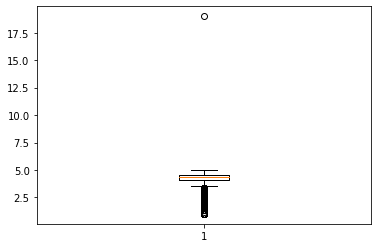

In [ ]:
plt.boxplot(playstore_df.Rating)

In [ ]:
# Check this row havaing an outlayer.
playstore_df[playstore_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In row 10472 have an outlayer and also we observed in Category column have a int value, so we drop this row

---



In [ ]:
#now we simlpey drop this row
playstore_df.drop([10472], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**2. Handling NaN in column 'Type'.**

In [ ]:
# check nan in type column
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
playstore_df[playstore_df.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.4,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


we have one NaN in Type column, so we observe most type of apps is free type

---



**>>In 'Type' column only one value is nan so we just replace NaN to FREE.**

In [ ]:
playstore_df['Type'].fillna(value='Free', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**3. Now we drop unwanted column like 'anaroid var' and 'current var'.**

In [ ]:
playstore_df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# now data frame look like
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
3003,Mackolik Live Results,SPORTS,3.9,188834,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 24, 2018"
1742,Traffic Racer,GAME,4.5,5387639,53M,"100,000,000+",Free,0,Everyone,Racing,"February 27, 2018"
8694,Status For WhatsApp DP - pro,PERSONALIZATION,4.4,49,12M,"10,000+",Free,0,Teen,Personalization,"May 31, 2018"
4723,Fantasy Squad W,FAMILY,4.3,2142,47M,"50,000+",Free,0,Everyone 10+,Role Playing,"April 16, 2018"
7026,Color by Number: Pixel Art,FAMILY,4.6,12034,34M,"1,000,000+",Free,0,Everyone,Entertainment,"May 26, 2018"
8168,Windguru Lite,WEATHER,4.0,9307,5.0M,"1,000,000+",Free,0,Everyone,Weather,"January 9, 2018"
3805,NPR One,NEWS_AND_MAGAZINES,3.9,13217,8.8M,"1,000,000+",Free,0,Teen,News & Magazines,"August 3, 2018"
10092,Fuel Calculator for EY,TOOLS,4.7,32,2.7M,"1,000+",Free,0,Everyone,Tools,"June 15, 2018"
4806,Gangster Town,GAME,4.1,74842,99M,"5,000,000+",Free,0,Teen,Action,"December 22, 2016"
6329,Basic Strategy Training BJ 21,GAME,4.4,0,23M,500+,Free,0,Teen,Casino,"March 7, 2016"


**4. Now we change change data type as per the colonm like Reviews,size,install and price have object data type so we change into numaric data type (int).**

**4.1 Change data type reviews(object) to reviews(int).**

In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(1), object(10)
memory usage: 971.0+ KB


In [ ]:
# reviews(object) to change (int)
playstore_df['Reviews'] = playstore_df.Reviews.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 971.0+ KB


**4.2 In 'installs' and 'price' colomn having '+' , ','  and '$' symbols so we removing this symols.**

In [ ]:
symbols = ['+', ',' , '$' ]
columns = ['Installs', 'Price']

for x in columns:
    for symb in symbols:
        playstore_df[x] = playstore_df[x].astype(str).str.replace(symb, '')
    playstore_df[x] = pd.to_numeric(playstore_df[x]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 971.0+ KB


**4.3 'size' having data in 'M' milions and data type is object so we change milions to numaric also change data type to int.**

In [ ]:
# Removing the + Sign
playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.strip('+'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# For removing the `,`
playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.replace(',', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# For converting the M to E+6
playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.replace('M', 'e+6'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# For convertinf the K to E+6
playstore_df['Size'] = playstore_df.Size.apply(lambda x: x.replace('k', 'e+3'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
playstore_df['Size'] = playstore_df.Size.replace('Varies with device', np.NaN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
 # Converting the string to Numeric type
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mode_size = playstore_df['Size'].mode()
print(mode_size[0])

11000000.0


In [ ]:
playstore_df['Size'].fillna(value=mode_size[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015"


# **Exploratory Analysis and Visualization**

> Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images



##**1. Analysis on Category.**

In [ ]:
y = playstore_df['Category'].value_counts().index
x = playstore_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

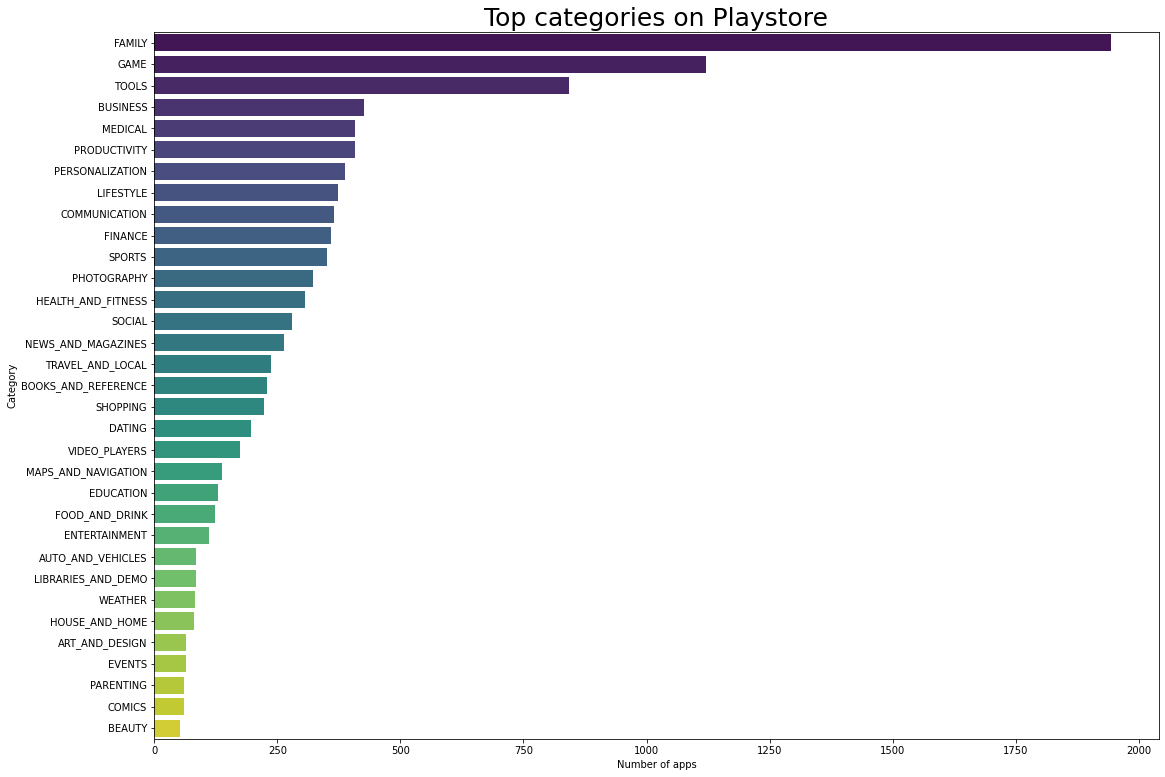

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Number of apps")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "viridis")
graph.set_title("Top categories on Playstore", fontsize = 25);

##**2. Analysis on Genres.**

In [ ]:
toappsgenres = playstore_df['Genres'].value_counts().head(35)

In [ ]:
xsis = []
ysis = []
for i in range(len(toappsgenres)):
    xsis.append(toappsgenres.index[i])
    ysis.append(toappsgenres[i])

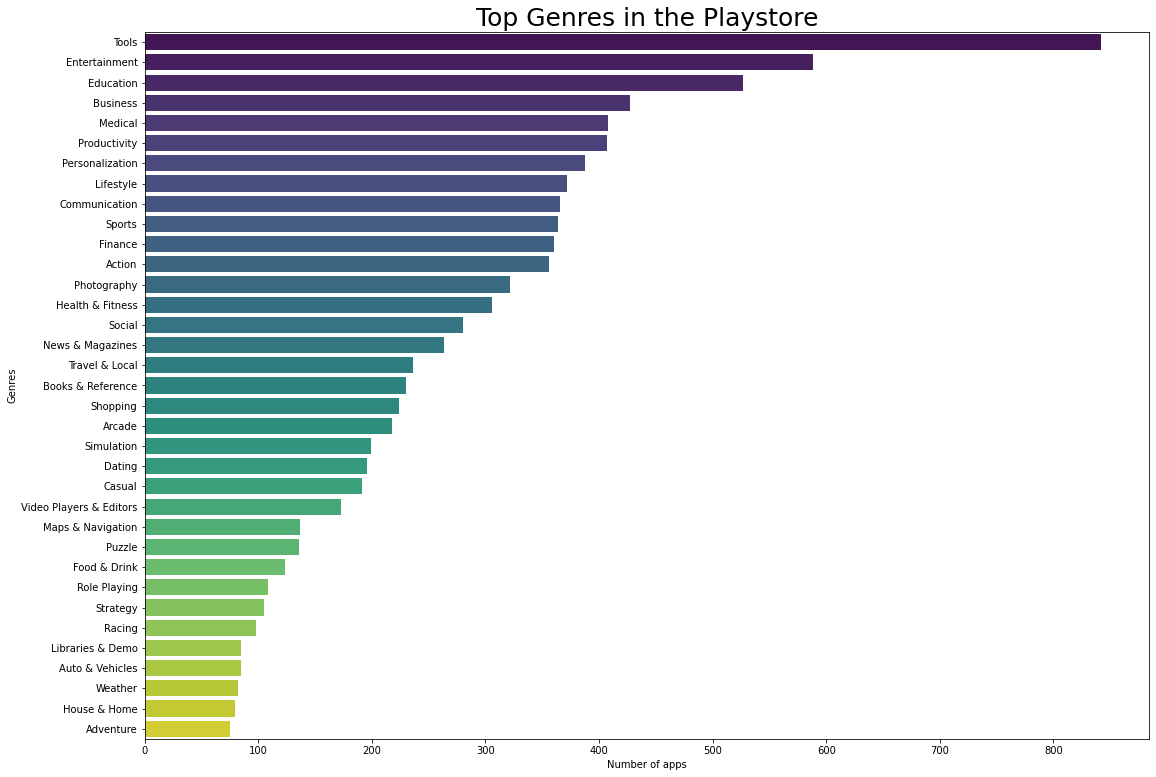

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Number of apps")
plt.ylabel("Genres")

graph = sns.barplot(x = ysis, y = xsis, palette= "viridis")
graph.set_title("Top Genres in the Playstore", fontsize = 25);

##**3. Analysis on Category vs Installs.**

In [ ]:
highest_Installs_df = playstore_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
# groupby category and installs
highest_Installs_df.head()

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452771915


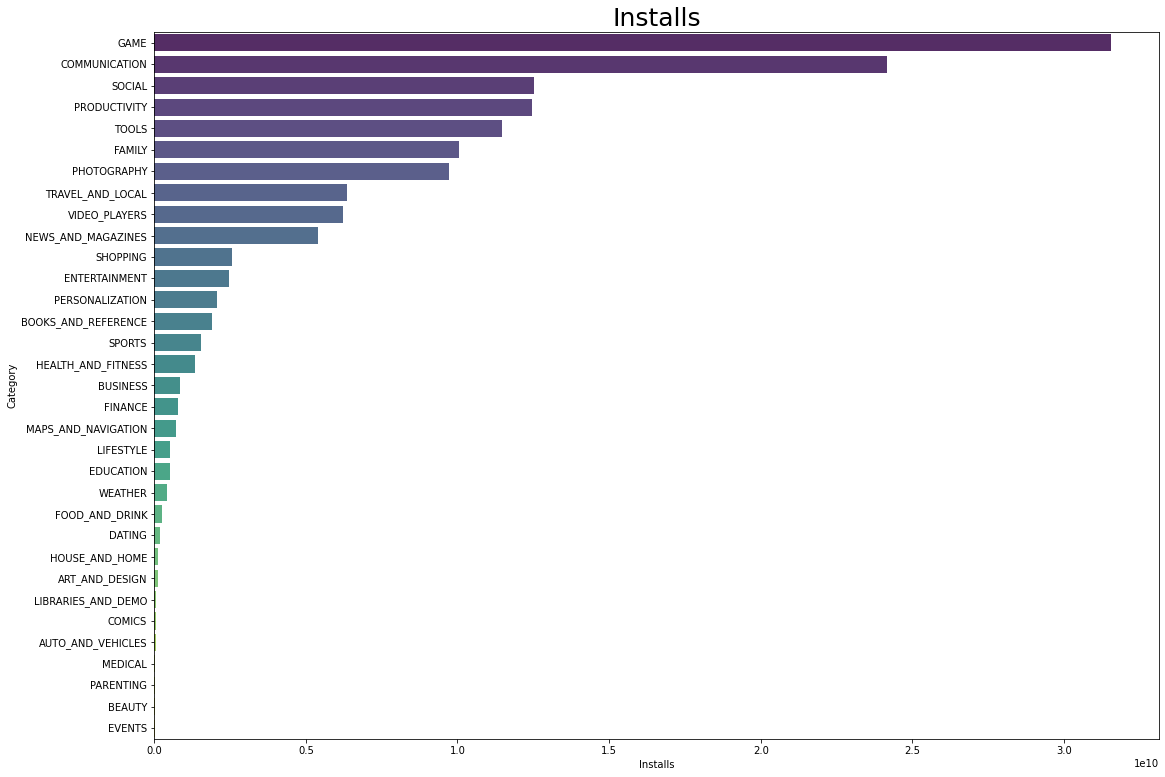

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [ ]:
def top_installed_in_incategory(str):
    str = str.upper()
    top10 = playstore_df[playstore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(10,5))
    plt.title('Top Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "viridis")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

**3.1 Top Installed apps in game.**

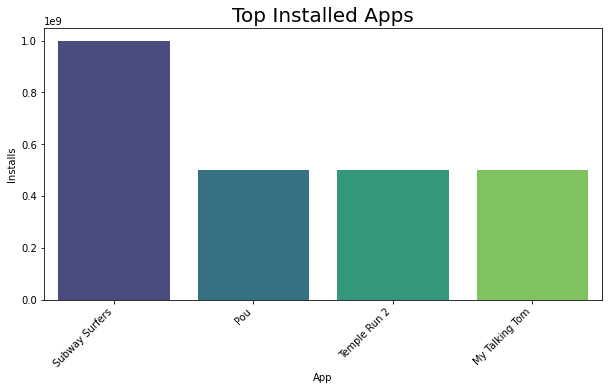

In [ ]:
top_installed_in_incategory('GAME')

**3.2 Top Installed apps in communication.**

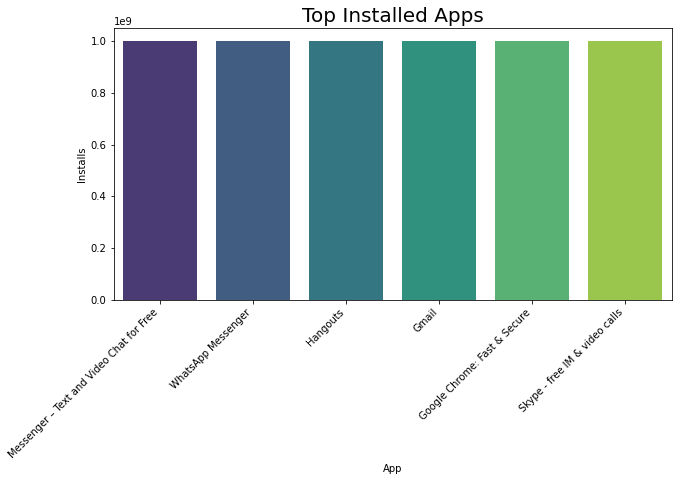

In [ ]:
top_installed_in_incategory('COMMUNICATION')

**3.3 Top Installed apps in social.**

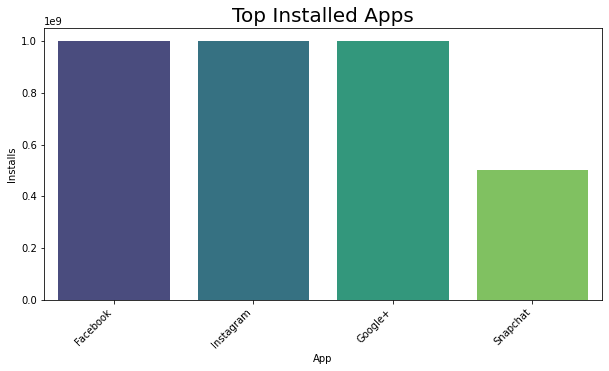

In [ ]:
top_installed_in_incategory('SOCIAL')

##**4. Let's plot a visualization graph to view what portion of the apps in playstore are paid and free.**

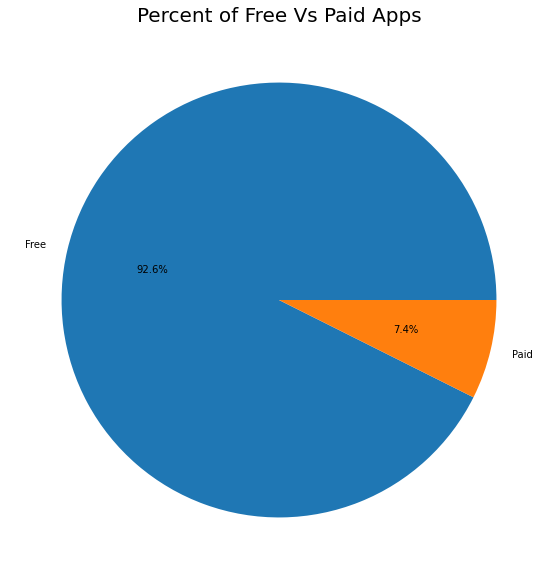

In [ ]:
plt.figure(figsize=(10,10))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percent of Free Vs Paid Apps',size = 20)
plt.show()

**4.1 Top Free Apps from Category.**

In [ ]:
free_apps_df = playstore_df[playstore_df['Type'] == 'Free']

In [ ]:
top_free_df = free_apps_df[free_apps_df['Installs'] == free_apps_df['Installs'].max()]

In [ ]:
top_free_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,11000000.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018"
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,11000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11000000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018"
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,11000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018"
340,Gmail,COMMUNICATION,4.3,4604324,11000000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


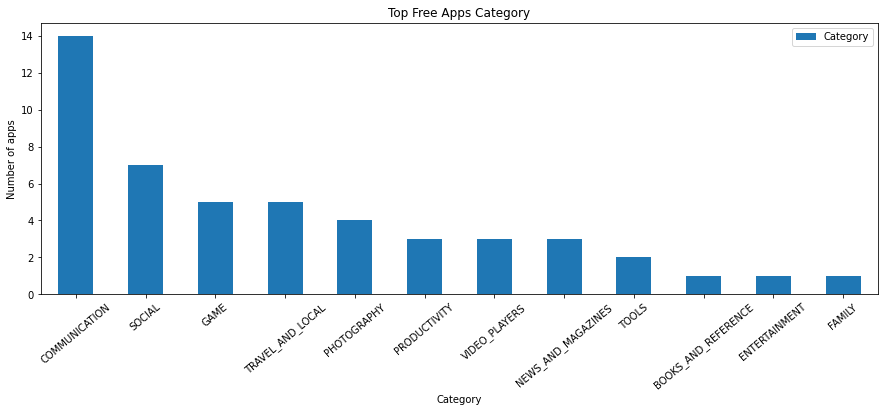

In [ ]:
top_free_df[playstore_df['Type'] == 'Free']['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Top Free Apps Category')
plt.xticks(rotation=40)
plt.legend()

**4.2 Top paid Apps from Category.**

In [ ]:
paid_apps_df = playstore_df[playstore_df['Type'] == 'Paid']
paid_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018"
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017"
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,11000000.0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018"
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,11000000.0,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018"
477,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017"
...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.4,17,157000.0,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015"
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018"
10782,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015"
10785,"sugar, sugar",FAMILY,4.2,1405,9500000.0,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018"


In [ ]:
earning_df = paid_apps_df[['App','Type','Installs', 'Price', 'Category']]

earning_df

,App,Type,Installs,Price,Category
234,TurboScan: scan documents and receipts in PDF,Paid,100000,4.99,BUSINESS
235,Tiny Scanner Pro: PDF Doc Scan,Paid,100000,4.99,BUSINESS
427,Puffin Browser Pro,Paid,100000,3.99,COMMUNICATION
476,"Moco+ - Chat, Meet People",Paid,10000,3.99,DATING
477,Calculator,Paid,1000,6.99,DATING
...,...,...,...,...,...
10735,FP VoiceBot,Paid,100,0.99,FAMILY
10760,Fast Tract Diet,Paid,1000,7.99,HEALTH_AND_FITNESS
10782,Trine 2: Complete Story,Paid,10000,16.99,GAME
10785,"sugar, sugar",Paid,10000,1.20,FAMILY


In [ ]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price']
earning_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,App,Type,Installs,Price,Category,Earnings
234,TurboScan: scan documents and receipts in PDF,Paid,100000,4.99,BUSINESS,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,Paid,100000,4.99,BUSINESS,499000.0
427,Puffin Browser Pro,Paid,100000,3.99,COMMUNICATION,399000.0
476,"Moco+ - Chat, Meet People",Paid,10000,3.99,DATING,39900.0
477,Calculator,Paid,1000,6.99,DATING,6990.0
...,...,...,...,...,...,...
10735,FP VoiceBot,Paid,100,0.99,FAMILY,99.0
10760,Fast Tract Diet,Paid,1000,7.99,HEALTH_AND_FITNESS,7990.0
10782,Trine 2: Complete Story,Paid,10000,16.99,GAME,169900.0
10785,"sugar, sugar",Paid,10000,1.20,FAMILY,12000.0


In [ ]:
top_paid_df = earning_df.nlargest(20, 'Earnings')
top_paid_df

,App,Type,Installs,Price,Category,Earnings
2241,Minecraft,Paid,10000000,6.99,FAMILY,69900000.0
4347,Minecraft,Paid,10000000,6.99,FAMILY,69900000.0
5351,I am rich,Paid,100000,399.99,LIFESTYLE,39999000.0
5356,I Am Rich Premium,Paid,50000,399.99,FINANCE,19999500.0
4034,Hitman Sniper,Paid,10000000,0.99,GAME,9900000.0
7417,Grand Theft Auto: San Andreas,Paid,1000000,6.99,GAME,6990000.0
2883,Facetune - For Free,Paid,1000000,5.99,PHOTOGRAPHY,5990000.0
5578,Sleep as Android Unlock,Paid,1000000,5.99,LIFESTYLE,5990000.0
8804,DraStic DS Emulator,Paid,1000000,4.99,GAME,4990000.0
4367,I'm Rich - Trump Edition,Paid,10000,400.00,LIFESTYLE,4000000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


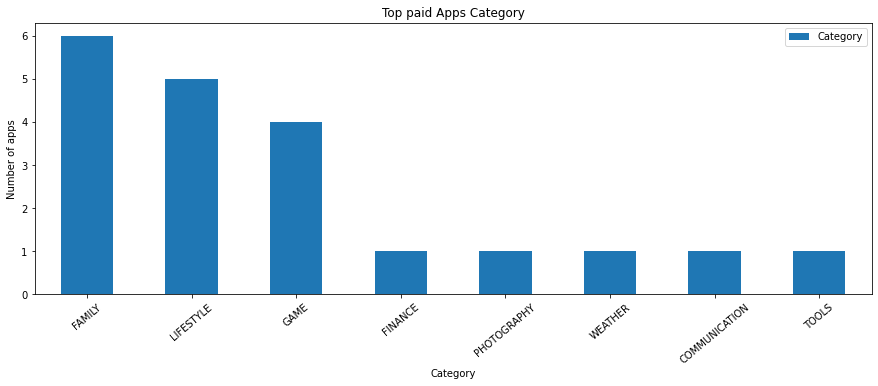

In [ ]:
top_paid_df[playstore_df['Type'] == 'Paid']['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Top paid Apps Category')
plt.xticks(rotation=40)
plt.legend()

##**5. rattings.**

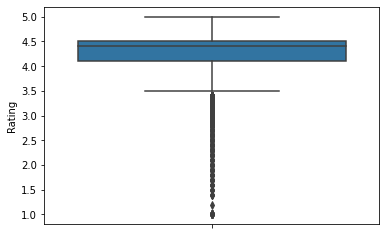

In [ ]:
# box plot of rattinga
sns.boxplot(data = playstore_df['Rating'],y = playstore_df['Rating'])

In [ ]:
# ratting median
playstore_df['Rating'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.4
10839    4.5
10840    4.5
Name: Rating, Length: 10357, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


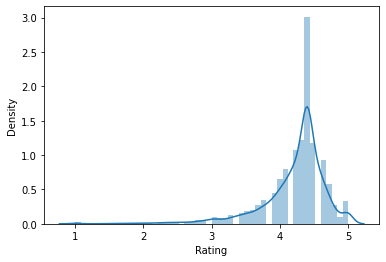

In [ ]:
sns.distplot(playstore_df['Rating'])

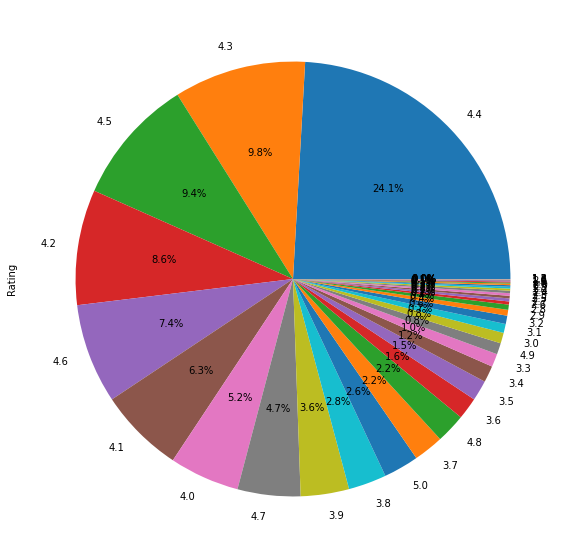

In [ ]:
playstore_df['Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
# plt.legend()

##**6.Distribution of apps in term of their rating, size and type.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


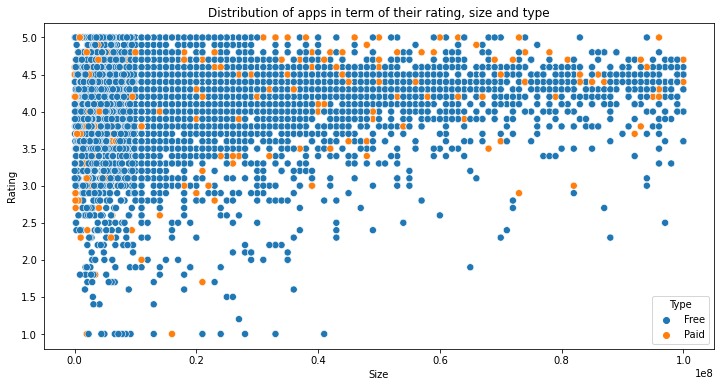

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
plt.title('Distribution of apps in term of their rating, size and type' )
sns.scatterplot(playstore_df['Size'],
               playstore_df['Rating'],
               hue=playstore_df['Type'],
               s=50)

##**7. Heat map on Rating,Reviews,Size,Installs and Price.**

In [ ]:
playstore_df.corr()  

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.058593,0.041429,0.039363,-0.018818
Reviews,0.058593,1.000000,0.102119,0.634997,-0.009417
Size,0.041429,0.102119,1.000000,0.042232,-0.019710
Installs,0.039363,0.634997,0.042232,1.000000,-0.011147
Price,-0.018818,-0.009417,-0.019710,-0.011147,1.000000


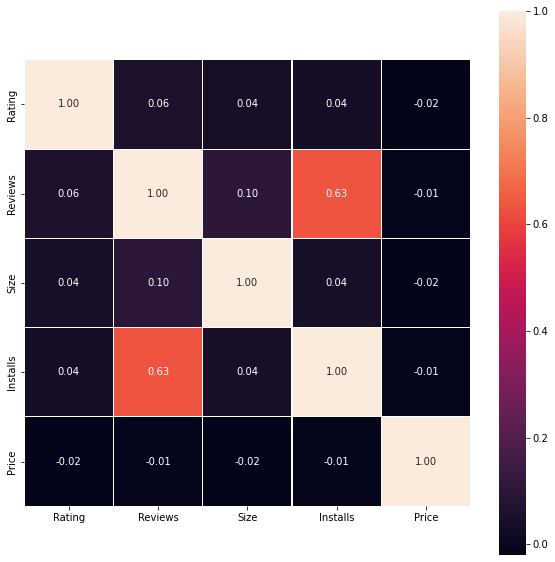

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(playstore_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

##**8. user reviews.**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

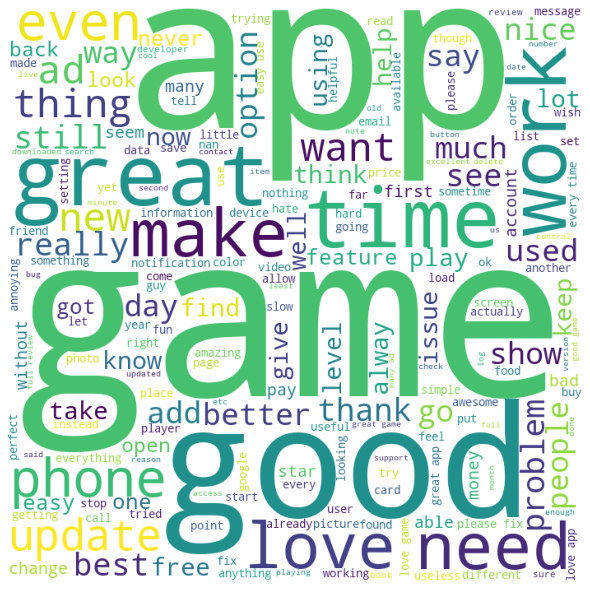

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in user_review_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Conclusion**

The Play Store Apps provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity.

*   Family, Games and Tools categories have highest number of apps availible in app store.
*   Communication, Game and Social categories highest number of installed.
*   Games category top most install apps are subway surfers,Pou,Temple run2 and My tolking tom 2.
*   Communication categaory top number of installed apps are Messenger, Whatsapp, Hangouts and Gmail.

*   Social categaory top number of installed apps are Facebook, Instagram, Google+ and Gmail.

*   In app store 92.6% free apps and 7.4% paid apps available.
*   top 20 free apps belongs to communication,social and game category.


*   Top 20 paid apps belongs to family, lifestyle and game.

*   Average ratings are 4.12.
*   Small size of apps getting high ratting.





